In [1]:
import torch
import torch.nn as nn
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer, MaxAbsScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

df = pd.read_csv('../Time Series Data/time_series_covid_19_confirmed_US.csv')
df.dropna(inplace = True)
x = np.arange('2020-01-22', '2020-04-21', dtype = 'datetime64[D]')
#df['Country/Region Code'] = df['Country/Region'].astype('category').cat.codes.values
#df['Province/State Code'] =  df['Province/State'].astype('category').cat.codes.values
a = df.drop(['UID', 'iso3', 'iso2', 'code3', 'FIPS', 'Admin2', 'Province_State','Country_Region','Lat','Long_', 'Combined_Key'], axis = 1, inplace  = False)
df2 = pd.DataFrame()
for i,name in enumerate(df['Combined_Key']):
    df2[name] = a.iloc[i]
df2

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",...,"Unassigned, South Dakota, US","Unassigned, Tennessee, US","Unassigned, Texas, US","Unassigned, Utah, US","Unassigned, Vermont, US","Unassigned, Virginia, US","Unassigned, Washington, US","Unassigned, West Virginia, US","Unassigned, Wisconsin, US","Unassigned, Wyoming, US"
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/28/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/29/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/30/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/31/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
def plotGraph(name):
    plt.figure(figsize = (12,10))
    plt.title(name)
    plt.plot(df2[name])
    plt.autoscale(axis='x',tight=True)
    plt.xlim(('3/13/20','4/2/20'))

def test_train(name,test_size,num):
    m = df2[name].values.astype(float)
    train_set = m[num:-test_size]
    test_set = m[-test_size:]
    return train_set, test_set

def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out


    scaler = PowerTransformer(method='box-cox', standardize=False)
    x_norm2 = scaler.fit_transform(train_set.reshape(-1,1))
    train_norms = torch.FloatTensor(x_norm2).view(-1)
    

def training(epoch, train_data, losses):
    for i in range(epoch):
        for seq,y_train in train_data:
            optimizer.zero_grad()
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            y_pred = model(seq)
            loss = torch.sqrt(criterion(y_pred, y_train))
            loss.backward()
            optimizer.step()
        print(f'epoch: {i} loss: {loss.item()}')
        losses.append(loss.item())

48

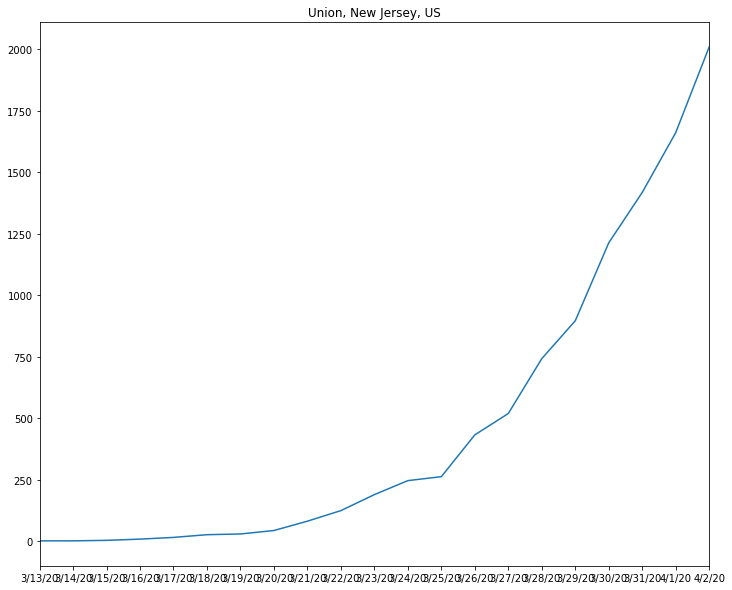

In [3]:
plotGraph('Union, New Jersey, US')
x = []
y = 50
for num in df2['Union, New Jersey, US']:
    if(num == 0):
        x.append(num)
if(len(x)>=50):
    y = len(x)
train_set,test_set = test_train('Union, New Jersey, US',7,y)
len(x)

In [4]:
class LSTMcell(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 1650, output_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        self.hidden = (torch.zeros(1,1,self.hidden_size), torch.zeros(1,1,self.hidden_size))
        
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [5]:
torch.manual_seed(60)
model = LSTMcell()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001)
model

LSTMcell(
  (lstm): LSTM(1, 1650)
  (linear): Linear(in_features=1650, out_features=1, bias=True)
)

In [6]:
scaler = StandardScaler()
x_norm2 = scaler.fit_transform(train_set.reshape(-1,1))
train_norms = torch.FloatTensor(x_norm2).view(-1)
 

In [7]:
model.load_state_dict(torch.load('../Extra Data/unionnj.pt'))
model.eval()

LSTMcell(
  (lstm): LSTM(1, 1650)
  (linear): Linear(in_features=1650, out_features=1, bias=True)
)

In [8]:
window_size = 7
future = 7
pred = train_norms[-window_size:].tolist()
for i in range(future):
    with torch.no_grad():
        seq = torch.FloatTensor(pred[-window_size:])
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        pred.append(model(seq).item())

In [9]:
pred[-7:]

[2.552271604537964,
 4.022178649902344,
 6.0361857414245605,
 8.607612609863281,
 11.19957447052002,
 13.592309951782227,
 15.740010261535645]

In [10]:
z = scaler.inverse_transform(np.array(pred).reshape(-1,1))

In [11]:
z

array([[  42.99999896],
       [  80.99999911],
       [ 123.99999992],
       [ 188.99999729],
       [ 246.00000591],
       [ 262.00000205],
       [ 432.00000578],
       [ 416.72824488],
       [ 600.63611586],
       [ 852.61923104],
       [1174.34409265],
       [1498.6381961 ],
       [1798.00602997],
       [2066.71621318]])

(array([41.]), array([71.]))

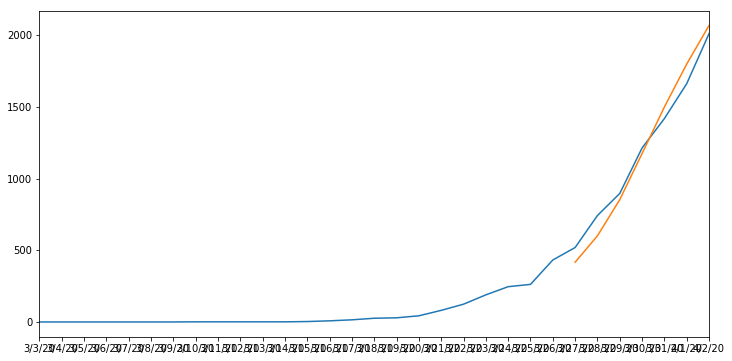

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df2['Union, New Jersey, US'])
plt.plot(['3/27/20','3/28/20','3/29/20','3/30/20','3/31/20','4/1/20','4/2/20'],z[-7:])
plt.xlim(('3/3/20','4/2/20'))

In [13]:
all_data_norm = scaler.fit_transform(df2['Union, New Jersey, US'].values.astype('float64').reshape(-1,1))
all_data_norm = torch.FloatTensor(all_data_norm).view(-1)
all_data = input_data(all_data_norm,7)

In [14]:
epochs = 1
losses = []

for i in range(epochs):
    for seq, y_train in all_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        loss = (criterion(y_pred, y_train))
        loss.backward()
        optimizer.step()
    print(f'epoch: {i} loss: {loss.item()}')
    losses.append(loss.item())

epoch: 0 loss: 3.2934775352478027


In [15]:
pred = all_data_norm[-7:].tolist()
for i in range(future):
    with torch.no_grad():
        seq = torch.FloatTensor(pred[-7:])
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        pred.append(model(seq).item())
        

In [16]:
pred[-7:]

[5.105052947998047,
 7.173491954803467,
 9.336041450500488,
 11.519070625305176,
 13.150232315063477,
 14.437199592590332,
 15.354089736938477]

In [17]:
z = scaler.inverse_transform(np.array(pred).reshape(-1,1))

In [18]:
z

array([[ 519.00001058],
       [ 741.99998532],
       [ 895.99999305],
       [1212.99996588],
       [1417.99997949],
       [1660.99998838],
       [2009.99996944],
       [2125.36075124],
       [2930.66810785],
       [3772.61559202],
       [4622.53644944],
       [5257.5982058 ],
       [5758.65441916],
       [6115.62814477]])

(array([61.]), array([78.]))

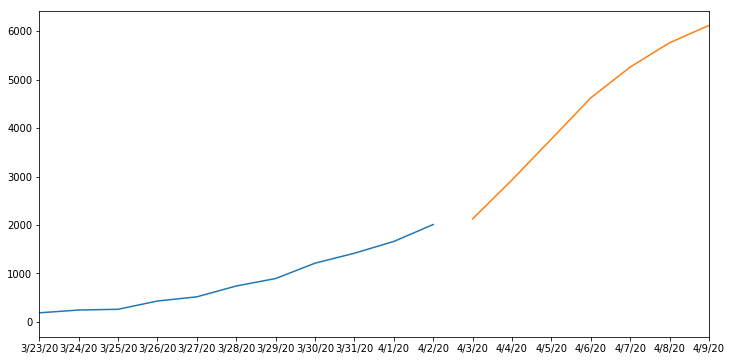

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df2['Union, New Jersey, US'])
plt.plot(['4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20'],z[-7:])
plt.xlim(('3/23/20','4/9/20'))